# LTAT.02.006 Andmeteaduse meetodid

## 3. praktikum - Jaotused

Siin on lühike ülevaade enamlevinud tõenäosusjaotustest. Klikkige vastaval lingil, et avada detailsem lehekülg scipy dokumentatsioonist. Seejuures tähistab diskreetsetel jaotustel k ning pidevatel x jaotusest genereeritavat väärtust ning need ei ole parameetrid. Kõigil alltoodud jaotustel on 1 kuni 3 parameetrit.

Klassikalised diskreetsed jaotused:

-   Bernoulli jaotus ([`bernoulli`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html)): kas sündmus toimus (1) või mitte (0)?
-   Binoomjaotus ([`binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)): juhuslik katse toimub n korda, õnnestumise tõenäosus on p. Mitu korda katse õnnestub? Näiteks mitu kirja tuleb 10 korda mündi viskamisel, $n = 10$ ja $p = 0.5$.
-   Poissoni jaotus ([`poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)): see näitab sündmuse toimumiste arvu ajaühikus, kui on teada, et keskmiselt toimub ajaühikus $\lambda$ sündmust.
-   Negatiivne binoomjaotus ([`nbinom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html)): kui katse õnnestumise tõenäosus on $p$, siis mitu korda saab katse ebaõnnestuda, enne kui see jõuab $r$-ndat korda õnnestuda?
-   Geomeetriline jaotus ([`geom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html)): juhusliku katse õnnestumise tõenäosus on p. Mitu korda peab katset sooritama et saada esimene õnnestumine? Näiteks mitu korda peab täringut viskama et tuleks esimene kuus ($p = \frac{1}{6}$)?
-   Hüpergeomeetriline jaotus ([`hypergeom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html)): urnis on $N$ kuuli, nendest $K$ on mustad ja $N - K$ on valged. Sealt võetakse ilma tagasipanekuta välja $n$ kuuli. Väljavõetud kuulide seas olevate mustade kuulide arv on hüpergeomeetrilise jaotusega.
-   Zeta jaotus ([`zipf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zipf.html)): suvaliselt valitud sõna koht sageduse edetabelis.

Klassikalised pidevad jaotused:

-   Ühtlane jaotus ([`uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)): Ühtlase jaotusega juhuslik suurus langeb ühesuguse tõenäosusega kõikjale vahemikus $[a, b]$.
-   Normaaljaotus ([`norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)): see kirjeldab selliseid juhuslikke suurusi, mis tekivad paljude sõltumatute ja sama jaotusega juhuslike suuruste summast.
-   Log-normaaljaotus ([`lognorm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html)): see kirjeldab selliseid juhuslikke suurusi, mis tekivad paljude sõltumatute ja sama jaotusega juhuslike suuruste korrutisest.
-   Eksponentjaotus ([`expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)): kui ajaühikus toimuv sündmuste arv on Poissoni jaotusega, siis kahe sündumse vahele jääv aeg on eksponentjaotusega.
-   Gammajaotus ([`gamma`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html)): kui ajaühikus toimuv sündmuste arv on Poissoni jaotusega, siis aeg $n$-nda sündmuse toimumiseni on gammajaotusega.
-   Beetajaotus ([`beta`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html)): sellise jaotusega on $n$ ühtlasest jaotusest võetud punktide seas suuruselt $k$-ndal kohal olev väärtus.
-   Hii-ruut jaotus ([`chi2`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)): juhuslikul katsel on $k$ võimalikku tulemust, tulemuste tõenäosused on $p_1,p_2,...,p_k$ ning me teeme $n$ katset. Katseseeria käigus vaatlesime $x_i$ korda tulemust $i$. Keskmiselt võiks tulemus $i$ esineda $np_i$ korda. Et eeldatavaid ja tegelikke tulemuste esinemiste sagedusi võrrelda, arvutame hii-ruut statistiku:

$$ \chi^2 = \sum\_{i=1}^k \frac{(np_i - x_i)^2}{np_i} $$

Seda, kui palju võib arv $\chi^2$ kõikuda, näitabki hii-ruut jaotus. Kui see arv tuleb ebatavaliselt suur või väike, näitab see seda, et me ei ole tulemuste tõenäosuseid $p_1,...,p_k$ õigesti hinnanud.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, geom, hypergeom, nbinom, poisson, zipf
from scipy.stats import beta, chi2, expon, gamma, lognorm, norm, uniform

Järgnev abifunktsioon aitab meil diskreetsest jaotusest genereeritud andmeid võrrelda mõne klassikalise jaotuse tõenäosusfunktsiooniga (`pmf` - _probability mass function_). Selle jaoks tuleb andmed visualiseerida tulpdiagrammina selliselt, et väärtuste sagedused on teisendatud tõenäosusteks. Tõenäosusfunktsiooni arvutamiseks on vaja luua jaotuse objekt scipy teegist.


In [5]:
def võrdlev_joonis_diskreetne(andmed, scipy_jaotus, nr_bins = 21):
    # loeme kokku sagedused ning teisendame tõenäosusteks
    sagedused = np.bincount(andmed, minlength=nr_bins)
    tõenäosused = sagedused / len(andmed)

    # Joonistame andmed tupldiagrammina
    x_telg = range(0, nr_bins)
    plt.bar(x_telg, tõenäosused[:nr_bins], color='orange')

    # Joonistame jaotuse tõenäosusfunktsiooni
    plt.plot(x_telg, scipy_jaotus.pmf(x_telg), '-o', color='blue')

    plt.show()

Pidevast jaotusest genereeritud andmete puhul tuleks tulpdiagrammi asemel kasutada histogrammi. Et histogramm sageduste asemel tõenäosusi näitaks, on vaja parameetrit `density=True`. Jaotuse kuju paremaks uurimiseks võib ka muuta `bins` parameetrit (vahemike arv). Tõenäosusfunktsiooni asemel on tihedusfunktsioon (`pdf` - _probability density function_).


In [6]:
def võrdlev_joonis_pidev(andmed, scipy_jaotus, bins=15):
    # Joonistame andmed histogrammina
    plt.hist(andmed, bins=bins, density=True, color="orange")

    # Joonistame tihedusfunktsiooni.
    x_telg = np.linspace(0, max(andmed), 1000)
    plt.plot(x_telg, scipy_jaotus.pdf(x_telg), color='blue')

    plt.show()

# Ülesanne 1 - tõenäosusjaotuste äratundmine

Selle ülesande eesmärk on klassikaliste tõenäosusjaotuste meenutamine või nendega tutvumine ning intuitsiooni arendamine nende andmetest äratundmiseks.

Lae alla andmefail `praktikum_3_andmed` kursuse lehelt ja paki lahti. Selles sisalduvad andmefailid `d1_*.csv` kuni `d7_*.csv`, mis sisaldavad seitsmest erinevast diskreetsest jaotusest genereeritud andmeid ning failid `c1_*.csv` kuni `c7_*.csv`, mis sisaldavad seitsmest erinevast pidevast jaotusest genereeritud andmeid. Faili nimes peale alakriipsu olev arv näitab, mitu andmepunkti vastavas andmestikus on. Arva ära, mis jaotustega on tegu ning hinda ligikaudu ära nende parameetrid.

Kõige lihtsam on jaotusi ära arvata kasutades kõige suuremaid andmefaile, aga proovi sellest hoolimata alustada kõigepealt väiksematest andmefailidest. Järgnevas on abiks pisut koodi, millega neid andmeid sisse lugeda ning klassikaliste jaotustega võrrelda.


Abifunktsioonid andmete failist sisse lugemiseks.


In [7]:
def discrete(i,s):
    return(np.array(pd.read_csv('praktikum_3_andmed/d%i_%i.csv'%(i,s),header=None)[0]))

def cont(i,s):
    return(np.array(pd.read_csv('praktikum_3_andmed/c%i_%i.csv'%(i,s),header=None)[0]))

Diskreetse jaotuse näitena loeme sisse andmed failist `d2_10.csv` ja võrdleme neid zeta jaotusega.


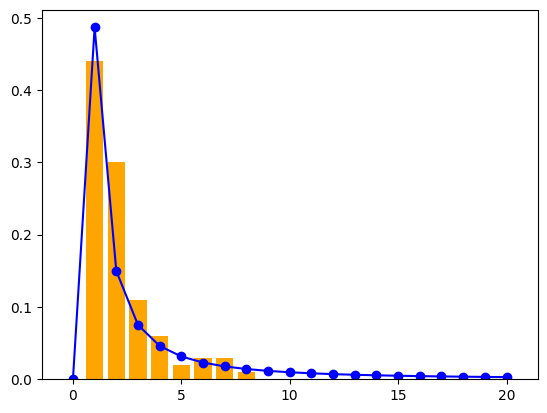

In [8]:
andmed = discrete(2, 100)
jaotus = zipf(a=1.7)
võrdlev_joonis_diskreetne(andmed, jaotus)

Pideva jaotuse näitena loeme sisse andmed failist `c6_1000.csv` ja võrdleme neid normaaljaotusega.


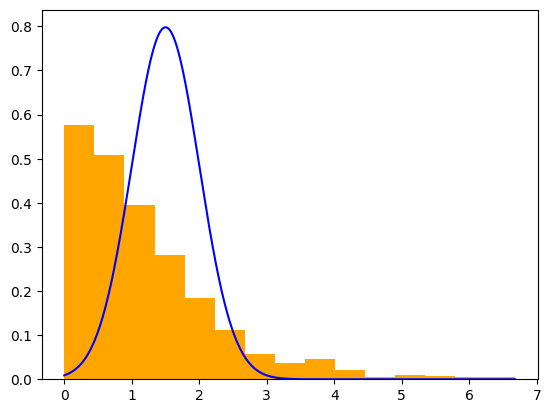

In [6]:
andmed = cont(6, 1000)
jaotus = norm(loc=1.5, scale=0.5)
võrdlev_joonis_pidev(andmed, jaotus)

VASTUS

Diskreetsed jaotused:

-   D1 on ...
-   D2 on ...
-   D3 on ...
-   D4 on ...
-   D5 on ...
-   D6 on ...
-   D7 on ...

Pidevad jaotused:

-   C1 on ...
-   C2 on ...
-   C3 on ...
-   C4 on ...
-   C5 on ...
-   C6 on ...
-   C7 on ...


# Ülesanne 2 - andmete genereerimisprotsessi äratundmine

Ilma andmeid reaalselt genereerimata arva ära, mis klassikaliste tõenäosusjaotuste perekonda allpool kirjeldatud jaotused võiks kuuluda.


(a) Genereeri palju andmestikke ühtlasest pidevast jaotusest vahemikus [0,1], igas andmestikus 10 andmepunkti.


In [7]:
rng = np.random.default_rng(0)
ühtlased_andmestikud = [
    uniform.rvs(size=10)
    for _ in range(1000)
]

(a1) Võta igast andmestikust suuruselt kolmas väärtus (ehk väiksuselt kaheksas). Mis jaotuse need väärtused moodustavad?


AttributeError: 'ellipsis' object has no attribute 'pdf'

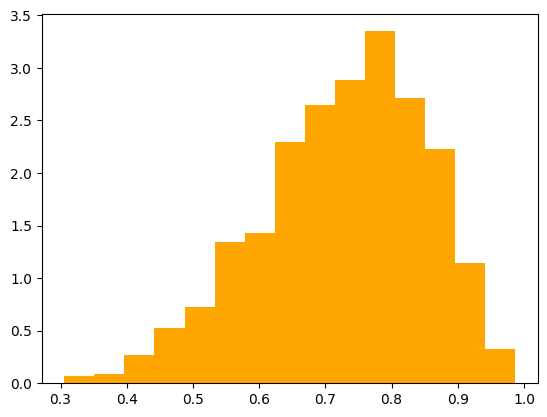

In [8]:
kolmandad = [
    sorted(andmestik)[7]
    for andmestik in ühtlased_andmestikud
]
jaotus = ...
võrdlev_joonis_pidev(kolmandad, jaotus)

(a2) Loe kokku vahemikku [0.1,0.9] jäävate punktide arv igas andmestikus. Mis jaotuse need punktide arvud moodustavad?


In [ ]:
jääb_vahemikku = [
    np.sum(np.logical_and(andmestik >= 0.1, andmestik <= 0.9))
    for andmestik in ühtlased_andmestikud
]
jaotus = ...
võrdlev_joonis_diskreetne(jääb_vahemikku, jaotus)

(b) Genereeri palju järjestatud andmestikke (järjendeid) 1000-st elemendist, kus iga element on jaotusega Bernoulli(0.1)


In [ ]:
bernoulli_andmestikud = [
    bernoulli.rvs(size = 1000, p = 0.1)
    for _ in range(10000)
]

(b1) Liida igas andmestikus kõik arvud kokku. Ligikaudu mis jaotusega on saadud summad?


In [ ]:
summad = [np.sum(andmestik) for andmestik in bernoulli_andmestikud]
jaotus = ...
võrdlev_joonis_diskreetne(summad, jaotus)

(b2) Igas andmestikus loe kokku mitme nulliga see algab. Mis jaotusega on nende nullide arvud?


In [ ]:
mitunulli = np.zeros(len(bernoulli_andmestikud), dtype=int)

for i in range(len(bernoulli_andmestikud)):
    andmestik = bernoulli_andmestikud[i]

    for j in range(len(andmestik)):
        if andmestik[j] == 1:
            mitunulli[i] = j
            break

jaotus = ...
võrdlev_joonis_diskreetne(mitunulli, jaotus)

(b3) Igas andmestikus loe kokku mitu nulli on enne kui tuleb kolmas 1. Mis jaotusega on nende nullide arvud?


(c) Genereeri 10000 andmepunkti ühtlasest pidevast jaotusest vahemikus [0,1].


(c1) Arvuta naaberpunktide (sorteeritud andmestikus järjestikuste punktide) vahelised kaugused. Ligikaudu mis jaotusega need kaugused on?


(c2) Arvuta üksteisest 10 andmepunkti kaugusel olevate punktide vahelised kaugused. Ligikaudu mis jaotusega need kaugused on?


(d) Genereeri palju andmestikke ühtlasest pidevast jaotusest vahemikus [0,1], igas andmestikus 10000 andmepunkti. Igas andmestikus loe kokku vahemikku [0.123, 0.124] jäävate punktide arv. Ligikaudu mis jaotusega nende punktide arv on?


(e) Genereeri palju andmestikke ühtlasest pidevast jaotusest vahemikus [0.9, 1.1], igas andmestikus 100 andmepunkti. Leia iga andmestiku andmepunktide korrutis. Mis jaotuse need korrutised moodustavad?
